<a href="https://colab.research.google.com/github/NooshinS/Machine-Learning/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Data Preparation

In [ ]:
dataset=pd.read_csv("creditcard.csv")
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


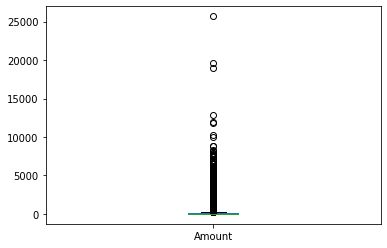

In [ ]:
#Finding outliers
dataset['Amount'].plot.box()

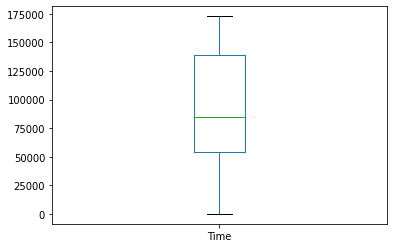

In [ ]:
dataset['Time'].plot.box()

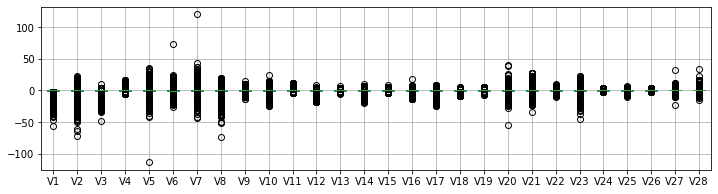

In [ ]:
df=dataset.iloc[ : , 1:29]
plt.figure(figsize=(12,3))
df.boxplot()

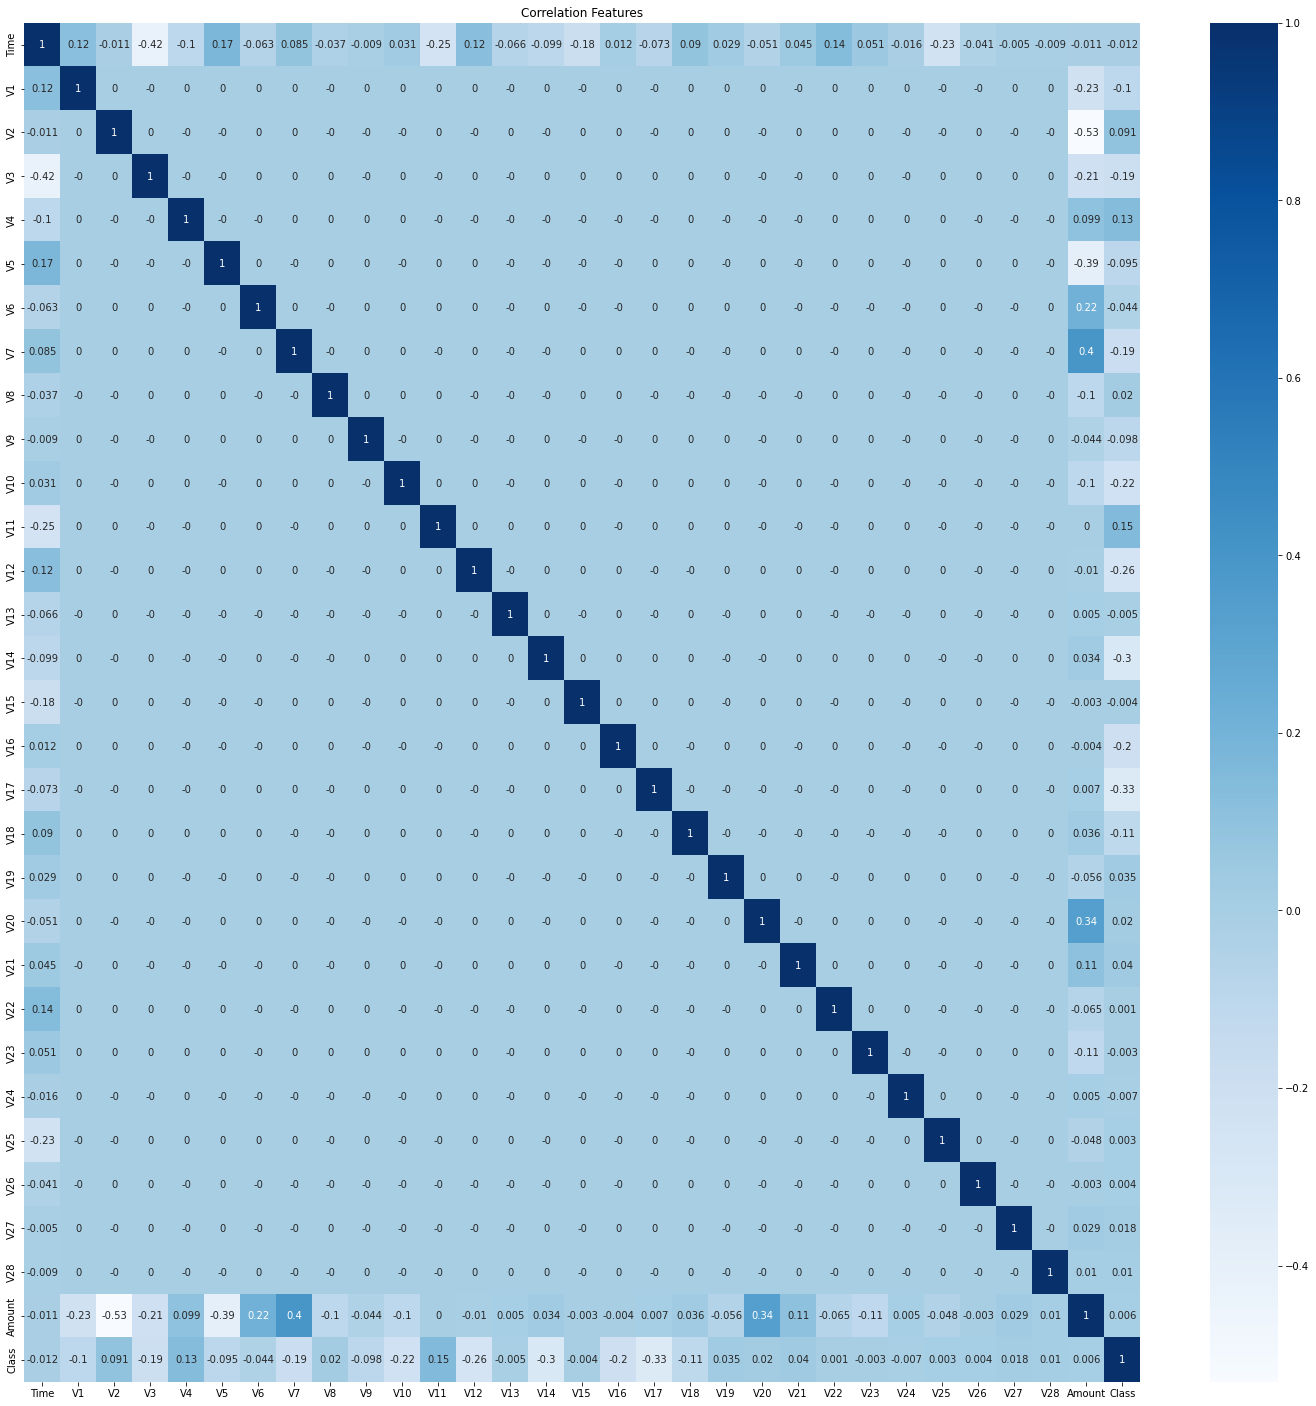

In [ ]:
#Correlation coefficients
corr= dataset.corr()  ## default pearson
plt.figure(figsize=(25,25))
sn.heatmap(round(corr,3), annot=True, cmap="Blues") 
sn.set(font_scale=1)
plt.title( 'Correlation Features')
plt.show()

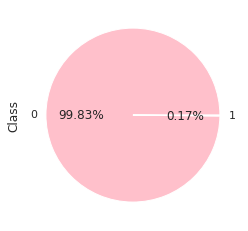

In [ ]:
#Plot to show the target
dataset['Class'].value_counts().plot.pie(autopct="%2.2f%%",colors = ['pink', 'green'])

Split the dataset

In [ ]:
#Spilit the data
x=dataset.iloc[ : ,1:-1].values
y=dataset.iloc[ : ,-1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size=0.2, random_state=1)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)
#Balancing
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
xo_train, yo_train = adasyn.fit_resample(x_train, y_train)

[[ 0.70809462 -0.33309249  0.05196576 ... -0.2373659  -0.04621919
  -0.22853596]
 [ 0.52139769 -0.11879436  0.79565055 ...  0.22491613  0.10472673
  -0.18861222]
 [-0.57715283  0.38466543  1.61695379 ...  0.14134596  0.30379126
  -0.26098906]
 ...
 [-0.58505726  1.02666699  1.07785783 ... -0.39860985  0.09056469
  -0.32400753]
 [ 0.8951394  -0.42493609 -0.04844455 ... -0.01402181 -0.06040878
   0.02630927]
 [-0.35963844  0.29769705  1.74240379 ... -0.94902672 -0.61292549
  -0.12230024]]
[[-0.31075426 -0.4675337  -0.09671045 ...  0.16413264  0.65502477
  -0.34726291]
 [-0.41419146  0.7981032   0.87559741 ...  0.4003265   0.17453682
  -0.34649978]
 [-0.16117169  0.67656302  0.63925363 ...  0.61361259  0.27275781
  -0.35087773]
 ...
 [-0.36820209 -0.07513081  0.81618498 ...  0.5545      0.00898488
  -0.17407258]
 [ 0.57139126 -0.10502436  0.71510361 ...  0.12932426  0.06350672
  -0.27665331]
 [-0.62831776 -0.07034196 -0.54107961 ...  0.08476111 -0.14539355
  -0.35119905]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training the model

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifierDT= DecisionTreeClassifier(criterion="entropy", random_state=0)
classifierDT.fit(xo_train, yo_train)
y_predDT=classifierDT.predict(x_test)
#SVM
#from sklearn.svm import SVC
#classifierSVM=SVC(kernel="linear", random_state=0)
#classifierSVM.fit(xo_train, yo_train)
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifierGNB=GaussianNB()
classifierGNB.fit(xo_train, yo_train)
y_predNB=classifierGNB.predict(x_test)
#K Nearest Neighbor
#from sklearn.neighbors import KNeighborsClassifier
#classifierKNN= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#classifierKNN.fit(xo_train, yo_train)
#y_predKNN=classifierKNN.predict(x_test)

Confusion matrix DT [[56781    94]
 [   24    63]]
Confusion matrix NB [[54632  2243]
 [   14    73]]


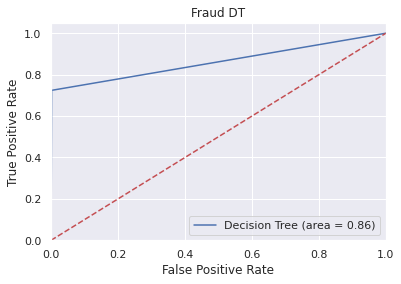

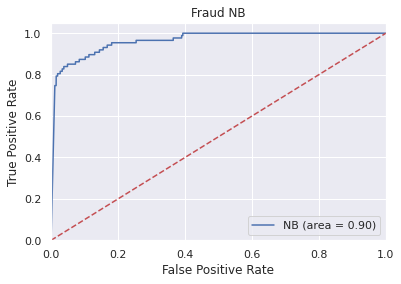

,Models,Accuracy,F1score,ROCAUCscore
0,Decision Tree,0.997928,0.516393,0.861243
1,Naive Bayes,0.960377,0.060757,0.899822


In [ ]:
Accuracy=[]
ROCauc=[]
F1SCore=[]
#Accuracy and Confusion matrix and ROC curve
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve
cmDT=confusion_matrix(y_test, y_predDT)
#cmSVM=confusion_matrix(y_test, y_predSVM)
cmNB=confusion_matrix(y_test, y_predNB)
#cmKNN=confusion_matrix(y_test, y_predKNN)
print('Confusion matrix DT',cmDT)
#print('Confusion matrix SVM',cmSVM)
print('Confusion matrix NB',cmNB)
#print('Confusion matrix KNN',cmKNN)
AccuracyDT=accuracy_score(y_predDT, y_test)
Accuracy.append(AccuracyDT)
#print('Accuracy-SVM', accuracy_score(y_predSVM, y_test))
AccuracyNB=accuracy_score(y_predNB, y_test)
Accuracy.append(AccuracyNB)
#print('Accuracy-KNN', accuracy_score(y_predKNN, y_test))
ROCAUCscoreDT=roc_auc_score(y_test, y_predDT)
ROCauc.append(ROCAUCscoreDT)
#print('ROCAUC scoreSVM:',roc_auc_score(y_test, y_predSVM))
ROCAUCscoreNB=roc_auc_score(y_test, y_predNB)
ROCauc.append(ROCAUCscoreNB)
#print('ROCAUC scoreKNN:',roc_auc_score(y_test, y_predKNN))
F1scoreDT=f1_score(y_test, y_predDT)
F1SCore.append(F1scoreDT)
#print('F1 scoreSVM:',f1_score(y_test, y_predSVM))
F1scoreNB=f1_score(y_test, y_predNB)
F1SCore.append(F1scoreNB)
#print('F1 scoreKNN:',f1_score(y_test, y_predKNN))
logit_roc_aucL = roc_auc_score(y_test, y_predDT)
fpr, tpr, thresholdsL = roc_curve(y_test, classifierDT.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_aucL)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fraud DT')
plt.legend(loc="lower right")
plt.show()
#logit_roc_aucD = roc_auc_score(y_test, y_predSVM)
#fpr, tpr, thresholdsD = roc_curve(y_test, classifierSVM.predict_proba(x_test)[:,1])
#plt.figure()
#plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_aucD)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Fraud SVM')
#plt.legend(loc="lower right")
#plt.show()
logit_roc_aucD = roc_auc_score(y_test, y_predNB)
fpr, tpr, thresholdsD = roc_curve(y_test, classifierGNB.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % logit_roc_aucD)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fraud NB')
plt.legend(loc="lower right")
plt.show()
#logit_roc_aucD = roc_auc_score(y_test, y_predKNN)
#fpr, tpr, thresholdsD = roc_curve(y_test, classifierKNN.predict_proba(x_test)[:,1])
#plt.figure()
#plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_aucD)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Fraud KNN')
#plt.legend(loc="lower right")
#plt.show()
results=pd.DataFrame({'Models':['Decision Tree', 'Naive Bayes'],'Accuracy':Accuracy,'F1score':F1SCore,'ROCAUCscore':ROCauc }, columns=['Models','Accuracy','F1score','ROCAUCscore'])
results   



In [ ]:
#Classifier of Models
classifierDT= DecisionTreeClassifier(criterion='entropy', random_state=0)
#classifierSVM=SVC(kernel='linear', random_state=0)
classifierGNB=GaussianNB()
classifierKNN= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)


In [ ]:
models=[]
models.append(('DecisionTreeClassifier',classifierDT))
#models.append(('SVC',classifierSVM))
models.append(('GaussianNB',classifierGNB))
#models.append(('KNeighborsClassifier',classifierKNN))
from sklearn.model_selection import cross_val_score

************** DecisionTreeClassifier ***********


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


accuracy score 0.9979284435237527
roc_auc_score 0.8612425918908677




[[56781    94]
 [   24    63]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


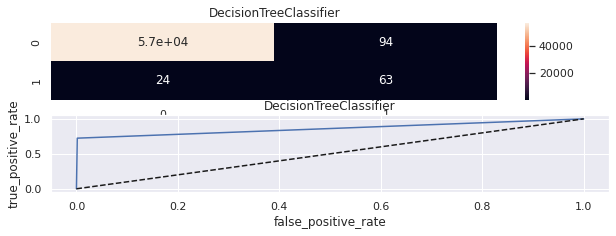

************** GaussianNB ***********


GaussianNB(priors=None, var_smoothing=1e-09)


accuracy score 0.9603770935009305
roc_auc_score 0.8998215485663762




[[54632  2243]
 [   14    73]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


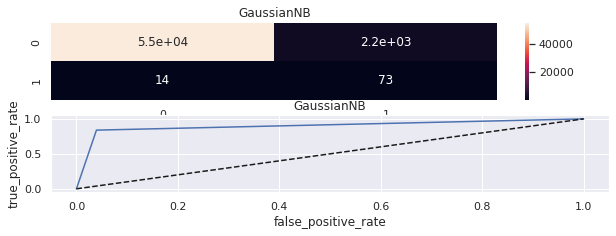

In [ ]:
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(xo_train,yo_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    #kfold=model_selection.KFold(n_splits=10,random_state=7)
    #cv=model_selection.cross_val_score(model,xo_train,yo_train,cv=10,scoring='accuracy').mean()
    #print('Cross-val-score=',cv)
    #cvs.append(cv*100)
    #print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
   # print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sn.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [ ]:
accuracy_random_forest=np.round(accuracy_score(y_pred_random_forest, y_test), decimals=3)